In [ ]:
import os
import matplotlib.pyplot as plt
import json
import re
import pandas as pd
import seaborn as sns

In [ ]:
models = ["qwen"]#, "mistral7B", "phi4"]

In [ ]:
eval_path = "/content/drive/MyDrive/Capstone/eval_samples"

In [ ]:
# rag_eval_path = "/content/drive/MyDrive/Capstone/eval_samples/rag_eval.json"
# no_rag_eval_path = "/content/drive/MyDrive/Capstone/eval_samples/no_rag_eval.json"

In [ ]:
# with open(rag_eval_path) as f:
#     rag_eval = json.load(f)

# with open(no_rag_eval_path) as f:
#     no_rag_eval = json.load(f)

In [ ]:
# total_samples = min(rag_eval["eval_samples"], no_rag_eval["eval_samples"])
# total_samples

20

In [ ]:
# print(no_rag_eval["eval_results"][0]["evaluation"])

In [ ]:
def process_eval_text(model, item, criteria, result_type):
  samp_idx = item["sample_index"]
  text = item["evaluation"]

  result_dict = {"judge_model": model,"sample_id": samp_idx, "result_type": result_type}
  for k,v in criteria.items():
    search_phrase = f"Criterion {k} ({v}):"# Score = "
    prefix_length = len(search_phrase)
    prefix_start_index = text.find(search_phrase)

    score = re.search(r"\d+\.?\d*", text[prefix_start_index + prefix_length:])[0]
    result_dict[v] = float(score)

  oscore_idx = text.find("Overall Score:")
  result_dict["Overall Score"] = float(re.search(r"\d+\.?\d*", text[oscore_idx:])[0])

  return result_dict


In [ ]:
criteria = {
    "1": "Relevance",
    "2": "Correct Identification of Top Features",
    "3": "Correct Explanation of Feature Effects",
    "4": "Contextually Accurate"
}

In [ ]:
results = []

for model in models:
  with open(os.path.join(eval_path, f"rag_eval_{model}.json")) as f:
      rag_eval = json.load(f)

  with open(os.path.join(eval_path, f"no_rag_eval_{model}.json")) as f:
      no_rag_eval = json.load(f)
  for item in rag_eval['eval_results']:
    results.append(process_eval_text(model = model, item = item, criteria = criteria, result_type = rag_eval["result_type"]))
  for item in no_rag_eval['eval_results']:
    results.append(process_eval_text(model = model, item = item, criteria = criteria, result_type = no_rag_eval["result_type"]))
  print(f"process completed for model: {model}")

process completed for model: qwen
process completed for model: mistral7B


In [ ]:
results

[{'judge_model': 'qwen',
  'sample_id': 50,
  'result_type': 'RAG',
  'Relevance': 4.0,
  'Correct Identification of Top Features': 5.0,
  'Correct Explanation of Feature Effects': 4.0,
  'Contextually Accurate': 4.0,
  'Overall Score': 4.5},
 {'judge_model': 'qwen',
  'sample_id': 100,
  'result_type': 'RAG',
  'Relevance': 4.0,
  'Correct Identification of Top Features': 5.0,
  'Correct Explanation of Feature Effects': 4.0,
  'Contextually Accurate': 4.0,
  'Overall Score': 4.4},
 {'judge_model': 'qwen',
  'sample_id': 150,
  'result_type': 'RAG',
  'Relevance': 4.0,
  'Correct Identification of Top Features': 5.0,
  'Correct Explanation of Feature Effects': 4.0,
  'Contextually Accurate': 4.0,
  'Overall Score': 4.5},
 {'judge_model': 'qwen',
  'sample_id': 200,
  'result_type': 'RAG',
  'Relevance': 3.0,
  'Correct Identification of Top Features': 5.0,
  'Correct Explanation of Feature Effects': 4.0,
  'Contextually Accurate': 3.0,
  'Overall Score': 4.0},
 {'judge_model': 'qwen',


In [ ]:
result_df = pd.DataFrame(results)

In [ ]:
result_df.head()

,judge_model,sample_id,result_type,Relevance,Correct Identification of Top Features,Correct Explanation of Feature Effects,Contextually Accurate,Overall Score
0,qwen,50,RAG,4.0,5.0,4.0,4.0,4.5
1,qwen,100,RAG,4.0,5.0,4.0,4.0,4.4
2,qwen,150,RAG,4.0,5.0,4.0,4.0,4.5
3,qwen,200,RAG,3.0,5.0,4.0,3.0,4.0
4,qwen,250,RAG,3.0,5.0,4.0,4.0,4.0


# Qwen results

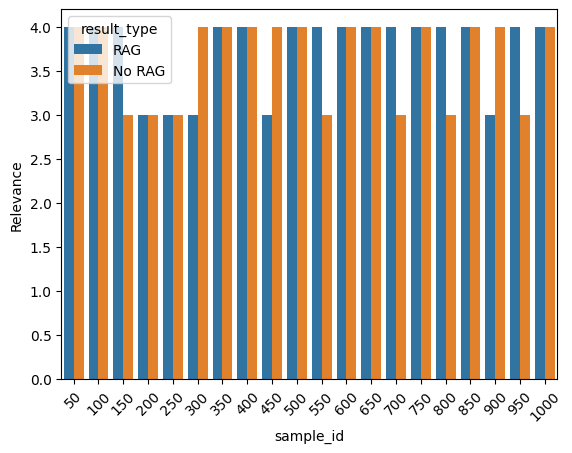

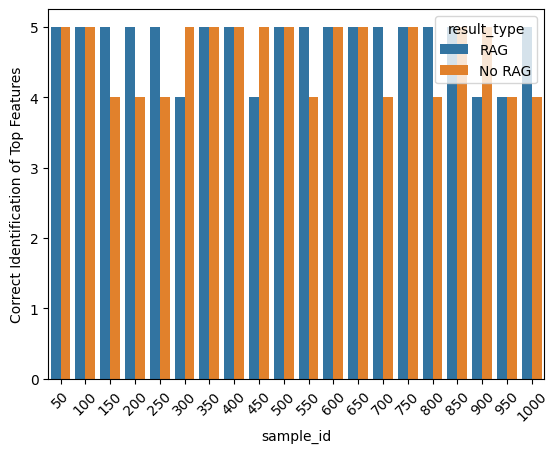

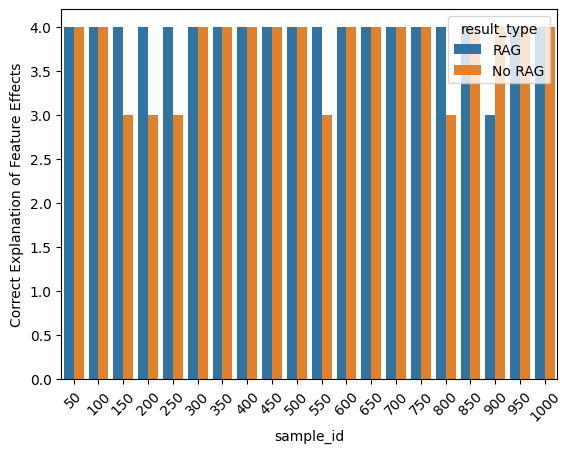

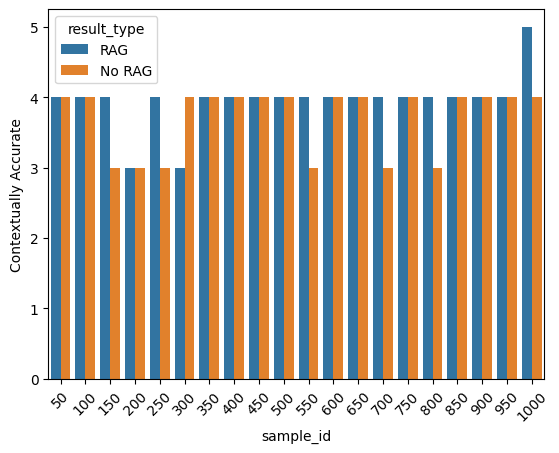

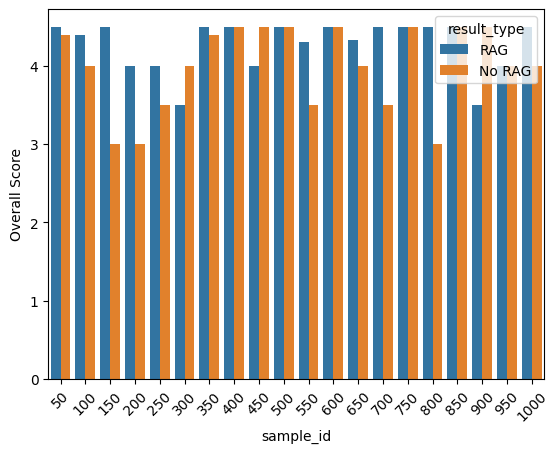

In [ ]:
for c in (list(criteria.values()) + ["Overall Score"]):
  sns.barplot(data = result_df[result_df["judge_model"] == "qwen"], x = "sample_id", y = c, hue = "result_type")
  plt.xticks(rotation = 45)
  plt.show()

## Mistral

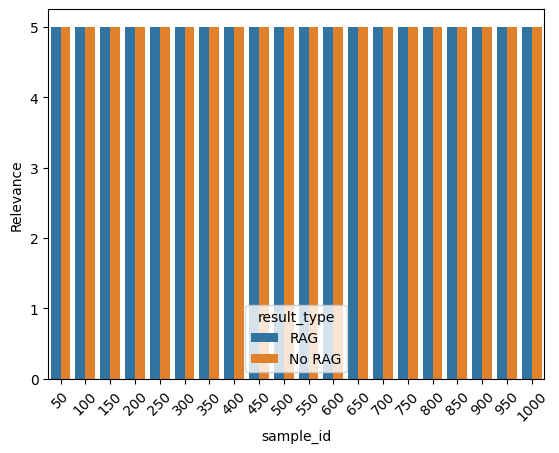

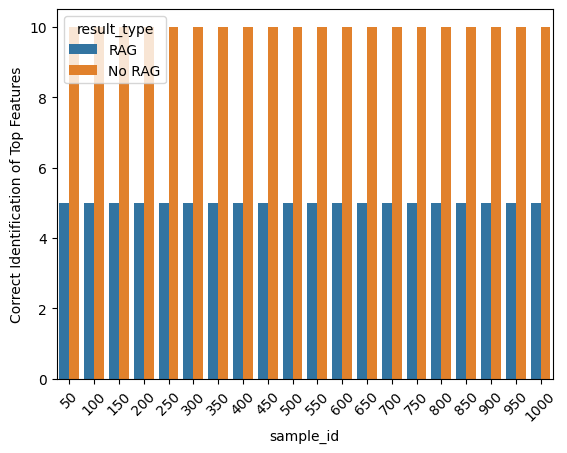

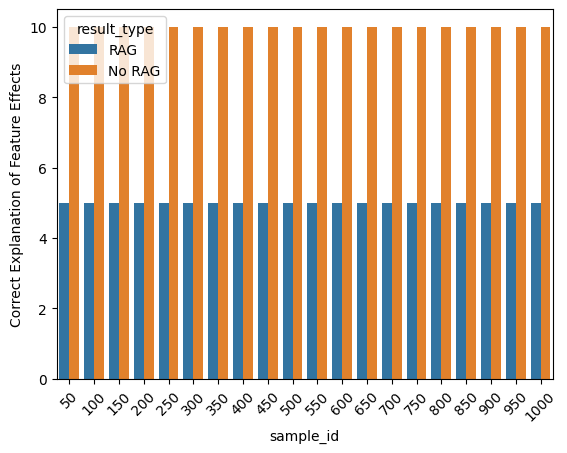

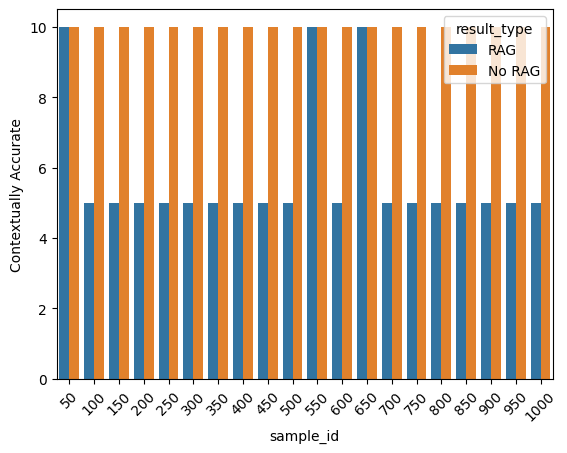

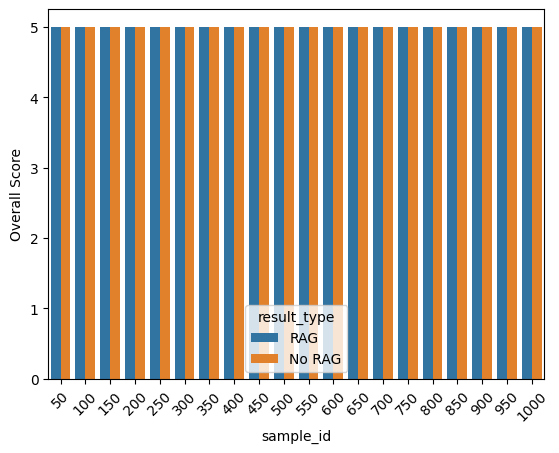

In [ ]:
for c in (list(criteria.values()) + ["Overall Score"]):
  sns.barplot(data = result_df[result_df["judge_model"] == "mistral7B"], x = "sample_id", y = c, hue = "result_type")
  plt.xticks(rotation = 45)
  plt.show()

# Debug

In [ ]:
def temp_process_eval_text(model, item, criteria, result_type):
  samp_idx = item["sample_index"]
  text = item["evaluation"]

  result_dict = {"judge_model": model,"sample_id": samp_idx, "result_type": result_type}
  for k,v in criteria.items():
    search_phrase = f"Criterion {k} ({v}):"# Score = "
    prefix_length = len(search_phrase)
    prefix_start_index = text.find(search_phrase)

    score = re.search(r"\d+\.?\d*", text[prefix_start_index + prefix_length:])[0]
    result_dict[v] = float(score)

  oscore_idx = text.find("Overall Score:")
  print(samp_idx, v, text)
  result_dict["Overall Score"] = float(re.search(r"\d+\.?\d*", text[oscore_idx:])[0])


  return result_dict


In [ ]:
results = []
model = "phi4"
with open(os.path.join(eval_path, f"rag_eval_{model}.json")) as f:
    rag_eval = json.load(f)

with open(os.path.join(eval_path, f"no_rag_eval_{model}.json")) as f:
    no_rag_eval = json.load(f)
for item in rag_eval['eval_results']:
  results.append(process_eval_text(model = model, item = item, criteria = criteria, result_type = rag_eval["result_type"]))
for item in no_rag_eval['eval_results']:
  results.append(temp_process_eval_text(model = model, item = item, criteria = criteria, result_type = no_rag_eval["result_type"]))
print(f"process completed for model: {model}")

50 Contextually Accurate ### Evaluation Task:
Evaluate the provided explanation based on the criteria given.

### Provided Explanation:
Iterate over each feature in the top 10 features, and output the requested sections for each feature.

**Top 10 Features:**

1. **addr_state**
	* Feature Definition:
		+ The title of the feature: Address State
		+ The value of this feature for the borrower: Montana
		+ A brief explanation of what this feature represents, and how it influences the loan repayment probability generally as well as specifically for the borrower.
		+ The feature represents the state where the borrower resides, and it influences the loan repayment probability by affecting the lender's risk assessment. In Montana, the borrower's value for this feature is a positive SHAP value, indicating that the lender is more likely to approve the loan.
	* SHAP Context:
		+ The SHAP value for the feature: 0.15132597
		+ A brief explanation of the feature's influence on the model's prediction

TypeError: 'NoneType' object is not subscriptable